# **Video Game Sales**

**★ 다음 분기에 어떤 게임을 설계해야 할까**

데이터 1980-2017 (1972년 게임기가 상용화)/
지역: 북미, 유럽, 일본 , 그외지역

### **결론**


*   게임: GTA(Grand Theft Auto), Cold of Duty, Wii Sports 
*   장르: Action, Sports, Shooter  
*   플랫폼: PS4,X360(최근 트렌드), Wii(최고 판매)

### **데이터 전처리**

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [142]:
df = pd.read_csv('/content/drive/MyDrive/codestates/vgames2.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [143]:
df.shape

(16598, 9)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [145]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [146]:
df = df.dropna(subset=['Year','Genre','Publisher'], axis=0) # 결측치에 대한 오랜 고민을 했으나, 적용할 방법을 찾지 못해 모두 제거하기로 결정

In [147]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [148]:
df['Year'] = df['Year'].astype(int)
#df.info()

In [149]:
df['Year'] = df['Year'].replace(2020, 2009) #Imagine: Makeup Artist game 2009년 출시 

In [150]:
df = df[df.apply(lambda x: x['Year'] >= 1972, axis=1)] # 1972년 미만 제거 (1972년 가정용 게임기 상용화)
df = df.sort_values('Year',ascending=False)
df.reset_index(drop=True,inplace=True)

In [151]:
# [출처] 코드스테이츠 AI 부트캠프 DAY 22~29) Video Game Sales Project|작성자 동원동 불주먹
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

df['Total_Sales'] = df[df.columns[5:]].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
2,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
3,FIFA 17,PC,2016,Sports,Electronic Arts,0.00,0.05,0.00,0.00,0.05
4,Life is Strange,PS4,2016,Adventure,Square Enix,0.14,0.15,0.03,0.06,0.38
...,...,...,...,...,...,...,...,...,...,...
16136,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
16137,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
16138,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
16139,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77


## **1. 지역에 따라서 선호하는 게임 장르가 다를까**

### **One-way (one factor) ANOVA를 활용한 가설 검정**

H0: 지역에 따른 장르별 선호(판매량)의 차이가 없다.

H1: 지역에 따른 장르별 선호(판매량)의 차이가 있다.

In [152]:
region_genre = df.groupby('Genre').sum()
region_genre = region_genre.loc[:,'NA_Sales':'Other_Sales']
region_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Platform,442.46,199.40,129.22,51.15
Puzzle,121.00,50.39,56.19,12.39
Racing,353.57,234.20,55.42,76.23
Role-Playing,307.08,176.31,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


In [153]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(region_genre['NA_Sales'],region_genre['EU_Sales'],region_genre['JP_Sales'], region_genre['Other_Sales'])
print(fvalue, pvalue)

9.033215078994816 8.93281619840392e-05


p-value (8.93281619840392e-05) < 0.05 

H0 기각

결론: 지역에 따라서 선호하는 게임 장르는 다를 수 있다.

### **지역에 따라 선호하는 게임 장르 TOP 10**

In [154]:
genre_totalsales = df['NA_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
genre_totalsales = genre_totalsales.nlargest(10, 'NA_Sales')[['NA_Sales']]

fig = px.bar(data_frame=genre_totalsales, x=genre_totalsales.index, y='NA_Sales', color=genre_totalsales.index)
fig.update_layout(title_text='Top 10 most Sold Genre - North America',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [155]:
genre_totalsales = df['EU_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
genre_totalsales = genre_totalsales.nlargest(10, 'EU_Sales')[['EU_Sales']]

fig = px.bar(data_frame=genre_totalsales, x=genre_totalsales.index, y='EU_Sales', color=genre_totalsales.index)
fig.update_layout(title_text='Top 10 most Sold Genre - Europe',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [156]:
genre_totalsales = df['JP_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
genre_totalsales = genre_totalsales.nlargest(12, 'JP_Sales')[['JP_Sales']]

fig = px.bar(data_frame=genre_totalsales, x=genre_totalsales.index, y='JP_Sales', color=genre_totalsales.index)
fig.update_layout(title_text='Top 12 most Sold Genre - Japan',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [157]:
genre_totalsales = df['Other_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
genre_totalsales = genre_totalsales.nlargest(10, 'Other_Sales')[['Other_Sales']]

fig = px.bar(data_frame=genre_totalsales, x=genre_totalsales.index, y='Other_Sales', color=genre_totalsales.index)
fig.update_layout(title_text='Top 10 most Sold Genre - Other',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

위 bar 그래프를 통해서 지역에 따른 장르별 판매량 상위 3개를 비교했을 때 북미, 유럽, 그 외 지역은 Action, Sports, Shooter 순서로 선호했다. 한편, 일본은 Role Playing을 가장 선호했고 이후 Action, Sports 순서로 선호했다. Action, Sports는 모든 지역에서 공통적으로 선호하는 장르였지만, 다른 장르에서는 지역 간 차이를 볼 수 있다.


## **2. 연도별 게임의 트렌드가 있을까**

In [158]:
games = df['Name'].value_counts()
publisher = df['Publisher'].value_counts()
platforms = df['Platform'].value_counts()
genres = df['Genre'].value_counts()

print('Games :', len(games))
print('Publisher :',len(publisher))
print('Platform :',len(platforms))
print('Genre :',len(genres))

Games : 11238
Publisher : 573
Platform : 31
Genre : 12


In [159]:
# (1980-2017) 연도별 최고 판매
maxsales = df.groupby(['Year', 'Name', 'Platform', 'Genre', 'Publisher'])['Total_Sales'].sum().reset_index()
cond = maxsales['Total_Sales'] == maxsales.groupby(['Year'])['Total_Sales'].transform(max)
maxsales = maxsales[cond]
maxsales.columns = ['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'Total_Sales']
maxsales[:].set_index('Year')

,Name,Platform,Genre,Publisher,Total_Sales
Year,,,,,
1980,Asteroids,2600,Shooter,Atari,4.31
1981,Pitfall!,2600,Platform,Activision,4.50
1982,Pac-Man,2600,Puzzle,Atari,7.81
1983,Baseball,NES,Sports,Nintendo,3.20
1984,Duck Hunt,NES,Shooter,Nintendo,28.31
1985,Super Mario Bros.,NES,Platform,Nintendo,40.24
1986,The Legend of Zelda,NES,Action,Nintendo,6.50
1987,Zelda II: The Adventure of Link,NES,Adventure,Nintendo,4.38
1988,Super Mario Bros. 3,NES,Platform,Nintendo,17.28


In [160]:
# (1980-2017) 연도별 최고 판매 total sales 기준 내림차순 15개
maxsales[:].set_index('Year').sort_values(by=["Total_Sales"], ascending=[False]).head(15)

,Name,Platform,Genre,Publisher,Total_Sales
Year,,,,,
2006,Wii Sports,Wii,Sports,Nintendo,82.74
1985,Super Mario Bros.,NES,Platform,Nintendo,40.24
2008,Mario Kart Wii,Wii,Racing,Nintendo,35.83
2009,Wii Sports Resort,Wii,Sports,Nintendo,33.00
1996,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38
1989,Tetris,GB,Puzzle,Nintendo,30.26
1984,Duck Hunt,NES,Shooter,Nintendo,28.31
2005,Nintendogs,DS,Simulation,Nintendo,24.75
1999,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,23.09


게임, 플랫폼, 장르, 제작사

## **3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [161]:
# 게임별 최고 판매 상위 10
game_totalsales = df['Total_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).to_frame()
game_totalsales_top = game_totalsales.nlargest(10, 'Total_Sales')[['Total_Sales']]

fig = px.bar(data_frame=game_totalsales_top, x=game_totalsales_top.index, y='Total_Sales', color=game_totalsales_top.index)
fig.update_layout(title_text='Top 10 most Sold Games ',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [162]:
# 2006년 이후 게임별 최고 판매 상위 10 
game_totalsales = df[df.apply(lambda x: x['Year'] >= 2006, axis=1)].groupby(df['Name']).sum().sort_values(by='Year',ascending=False)#.to_frame()
game_totalsales_top = game_totalsales.nlargest(10, 'Total_Sales')[['Total_Sales']]

fig = px.bar(data_frame=game_totalsales_top, x=game_totalsales_top.index, y='Total_Sales', color=game_totalsales_top.index)
fig.update_layout(title_text='Top 10 most Sold Games after 2006 ',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [163]:
GenreTotalGames = df['Total_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False).to_frame()
fig = go.Figure(data=[go.Pie(labels=GenreTotalGames.index,values=GenreTotalGames['Total_Sales'], opacity=0.9)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Video Game Sales by Genre',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

결론: 다음 분기에 설계할 게임으로는 Wii Sports, GTA, Cold of Duty를, 장르는 Action, Sports, Shooter 플랫폼은 PS4, X360, Wii 

장기적으로 비디오 게임은 2009년을 기점으로 게임 출시 및 판매량이 가파른 하향새를 보여준다. 플랫폼을 선정할 때 PS4, X360, Wii와 더불어 PC 또는 모바일에서도 사용 가능한 멀티 플랫폼을 설계하는 것이 필요할 것으로 예상된다.

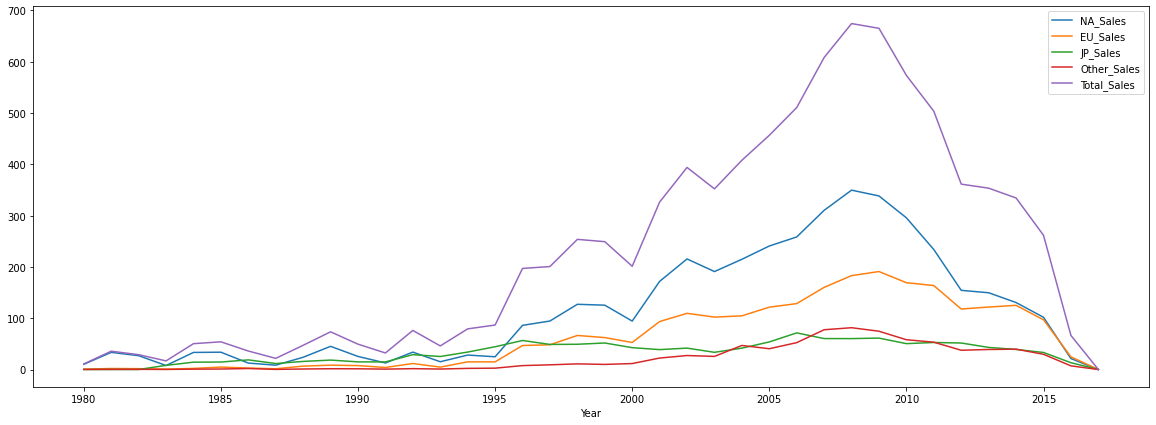

In [164]:
## (1980-2017) 연도에 따른 지역별 출시
df[[x for x in df.columns if "Sales" in x] + ["Year"]].groupby("Year").sum().plot(figsize=(20,7));

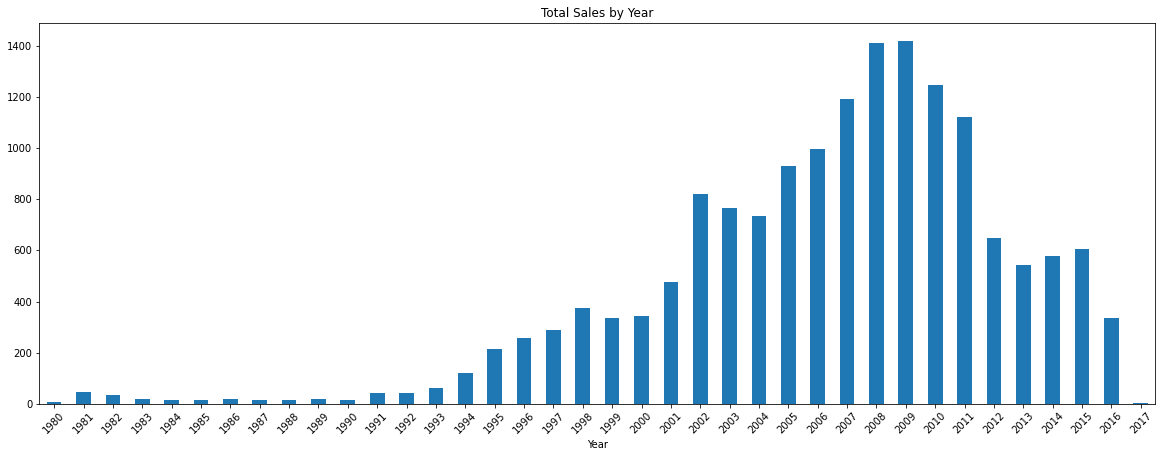

In [165]:
# (1980-2017) 연도별 게임 출고량 
df.groupby("Year")["Total_Sales"].count().plot(kind="bar", y="name", figsize=(20,7))
plt.title("Total Sales by Year")
plt.xticks(rotation=45)
plt.show()